# Laboratorium 3 - klasteryzacja (clustering)

> Klasteryzacja (zwana też często grupowaniem) polega na szukaniu naturalnie występujących skupisk w danych. Jest to zadanie z grupy algorytmów uczenia nienadzorowanego, ponieważ nie ma z góry znanej, optymalnej liczby klastrów, które występują (lub nie) w danym zbiorze - musi zostać ona wyznaczona eksperymentalnie. Teoretycznie chcemy, aby znalezione klastry zawierały egzemplarze danych w jakiś sposób do siebie podobnych. Bardzo często zakładaną miarą podobieństwa jest odległość między egzemplarzami danych, np. euklidesowa.  
  

> Grupowanie może być przydatne m.in w zadaniu segmentacji rynku: poddając dane klientów algorytmom klasteryzacji możemy znaleźć grupy klientów podobnych do siebie i np. zaproponować im podobną ofertę lub reklamę. Grupowanie jest też częścią niektórych algorytmów rekomendujących - sklep internetowy może nam sugerować np. produkty podobne do tych, które już kupiliśmy (grupowanie produktów) lub produkty kupione przez osoby o podobnym profilu do naszego (grupowanie klientów).

> Istnieje bardzo dużo algorytmów grupowania, które dają różne rezultaty w zależności od pierwotnego ułożenia danych. Część algorytmów wymaga podania na wstępie parametru w postaci liczby klastrów, część z nich podaje tę liczbę jako wynik swojego działania. Poniższa grafika z dokumentacji scikit-learn (https://scikit-learn.org/stable/modules/clustering.html) przedstawia efekty grupowania kilku 2-wymiarowych zbiorów danych za pomocą różnych algorytmów. Jak widać, nie każdy algorytm równie skutecznie dzieli dane na grupy (w tym wypadku skuteczność oznacza wykrycie grup, które są łatwo rozróżnialne w 2 wymiarach dla ludzkiego oka).

In [13]:
from IPython.display import Image
Image(url='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png', width=950, height=600)

## DBSCAN

> Jednym z stosunkowo popularniejszych i uniwersalnych w zastosowaniu jest algorytm DBSCAN, przedstawiony też na grafice powyżej. Przyglądając się jego wynikom na różnych danych zaobserwujemy m.in., że jest on w stanie wykrywać wartości odstające (kropki koloru czarnego, nie przypisane do żadnego z klastrów), nie wykrywa nadmiarowych klastrów w przypadku, gdy ich nie ma (ostatni rząd) oraz radzi sobie z bardziej skompikowanymi kształtami klastrów, które nie mają kulistego kształtu (pierwszy i drugi rząd).

> Zasada działania algorytmu jest stosunkowo prosta i opiera się na założeniu, że klastry występują tam, gdzie dane są odpowiednio "gęsto" ułożone. Na początku algorytm dostaje dwa parametry, ***n*** i ***epsilon*** - klaster wykryty jest tam, gdzie co najmniej *n* punktów znajduje się w odległości nie większej niż *epsilon* od pierwotnego punktu. Algorytm zaczyna pracę od losowego punktu i sprawdza, czy w odległości *epsilon* od niego znajduje się co najmniej n innych punktów. Jeśli tak, wszystkie te n+1 punktów zostaje zapisane do pierwszego klastra. Jeśli nie, to punkt zostaje uznany za wartość odstającą. Proces powtarzany jest dla wszystkich punktów aż do momentu, gdy każdy został zakwalifikowany do jakiegoś klastra lub uznany za odstający - wartości odstające określa się też jako "noise", czyli szum w danych.

> Poniższa animacja ilustruje, jak przebiega proces grupowania DBSCAN. Jak widać, liczba klastrów zostaje w ten sposób naturalnie wyznaczona na podstawie danych.

In [9]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/888/1*WBRWZwSeIw-V4Hw9-_0xrQ.gif')

## **Pytanie: w jakiej sytuacji DBSCAN nie będzie poprawnie wykrywać klastrów?**

## K-means clustering

> Kolejnym popularnym pomysłem na grupowanie jest algorytm k-średnich. Pierwszym krokiem algorytmu jest wylosowanie **k** punktów centralnych, które docelowo mają wyznaczyć centra klastrów. Na podstawie tych pierwszych, losowo wyznaczonych punktów dane są przypisywane do grup w następujący sposób: każdy punkt zostaje zapisany do jednego z **k** klastrów na podstawie najbliżej położonego punktu centralnego. Po przeprowadzeniu tego procesu do końca, wszystkie punkty są jednoznacznie przypisane do któregoś z klastrów. Jak poprawić te (chwilowo losowe) klastry? Dla każdego z nich wyznaczany jest nowy punkt centralny - tym razem nie losowo, tylko za pomocą średniej z punktów klastra. Po wyznaczeniu nowych centrów, cały proces jest powtarzany, tj. wszystkie punkty zostają ponownie przypisane do ich najbliżej znajdującego się centrum, następnie z ich średniej wyznaczane są nowe centra... Powtarzanie procesu zakańcza się w momencie, gdy centra klastrów w kolejnych iteracjach nie zmieniają swojego położenia.

> Film ilustrujący algorytm krok po kroku: https://youtu.be/4b5d3muPQmA?t=33

> Poniżej: animacja ilustrująca grupowania k-średnich

In [14]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/960/1*KrcZK0xYgTa4qFrVr0fO2w.gif')

# Zadanie

Zaimplementować samodzielnie wybrany algorytm grupowaniaa: DBSCAN lub k-średnich. Grupowanie nalezy wykonać na testowym zbiorze danych, wygenerowanych poniżej za pomocą specjalnej funkcji *make_blobs* z biblioteki scikit-learn.

## Dane

In [16]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [17]:
data, labels, centers = make_blobs(n_samples=[1000, 200, 100], n_features=2, random_state=2022, return_centers=True)

In [18]:
x = data[:, 0] # wydobywamy same koordynaty x ze wszystkich punktów
y = data[:, 1] # wydobywamy same koordynaty y ze wszystkich punktów

In [21]:
labels # dane zawieraja 3 klastry - tablica 'labels' przechowuje informację, do którego klastra należy n-ty punkt

array([1, 0, 0, ..., 0, 0, 0])

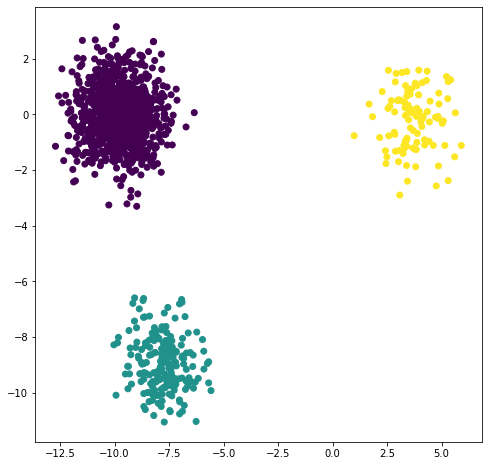

In [24]:
# przedstawiamy wygenerowane klastry na wykresie
# kolory odpowiadają 'właściwemu' podziałowi na klastry
# ten sam podział chcemy uzyskać za pomocą naszego algorytmu
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, c=labels)

plt.show()

Funkcje, które mogą przydać się w implementacji:

In [ ]:
# Generowanie n-wymiarowych punktów, których koordynaty mieszczą się w zakresie od 0 do 1
# np.random.uniform(low=0, high=1, size=(n,))

In [33]:
p31 = np.random.uniform(low=0, high=1, size=(3,)) # wylosuj trzy 1-wymiarowe punkty
p31

array([0.08291023, 0.08062271, 0.54220681])

In [34]:
p52 = np.random.uniform(low=0, high=1, size=(5, 2)) # wylosuj pięć 2-wymiarowych punktów
p52

array([[0.58349545, 0.57576271],
       [0.53805439, 0.65359556],
       [0.38639432, 0.62886817],
       [0.10977975, 0.01209693],
       [0.54257591, 0.41678714]])

In [35]:
# liczenie odległości euklidesowej między dwoma punktami
point_1 = np.array([3, 0])
point_2 = np.array([0, 0])

np.linalg.norm(point_1 - point_2)

3.0

In [41]:
# obliczenia za pomoca numpy mozna od razu wykonywac dla wszystkich elementów w tablicy:
np.mean(p31) # średnia arytmetyczna
ind = np.argmin(p31) # indeks najmniejszego elementu
p31[ind]

0.08062271349723305

In [43]:
# powtórka z Pythona:
listy = [[] for i in range(3)] # generacja listy n pustych list
listy[0].append(123) # dodawanie elementu do pierwszej z list
list(p31) # zamiana tablicy numpy na liste pythonowa
np.array([1, 2, 3]) # tablica numpy na podstawie listy liczb

[array([0.58349545, 0.57576271]),
 array([0.53805439, 0.65359556]),
 array([0.38639432, 0.62886817]),
 array([0.10977975, 0.01209693]),
 array([0.54257591, 0.41678714])]